In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

In [20]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [21]:
base = pd.read_csv("energydata_complete.csv")

In [22]:
base.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097
5,11-01-2016 17:50,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484
6,11-01-2016 18:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763
7,11-01-2016 18:10,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890
8,11-01-2016 18:20,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702
9,11-01-2016 18:30,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314


In [23]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [24]:
base_num = base.select_dtypes(include = ["number"])

In [25]:
corr = base_num.corr()

<AxesSubplot:>

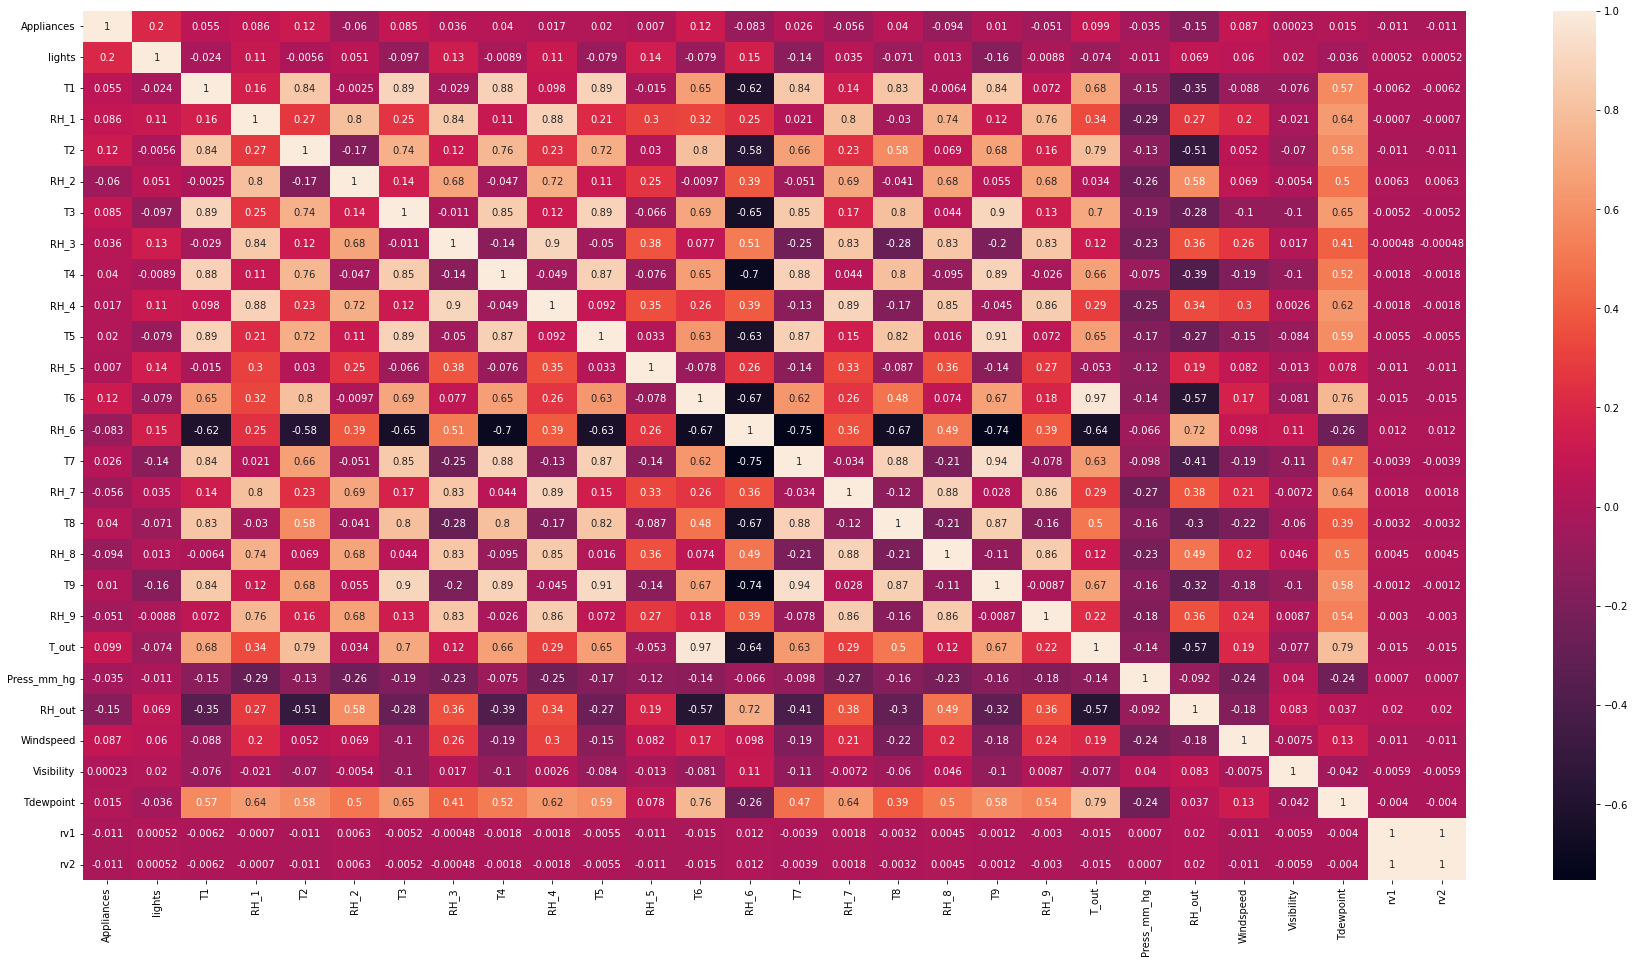

In [26]:
plt.figure(figsize = (31,16))
sn.heatmap(corr,annot = True)

In [27]:
corr.Appliances.sort_values(ascending=False)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015357
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

In [28]:
x = base_num[["lights","T2","T6","Windspeed","T3"]]

In [29]:
y = base_num["Appliances"]

In [30]:
base_aux = pd.concat([x,y],axis = 1)

<Figure size 1800x1152 with 0 Axes>

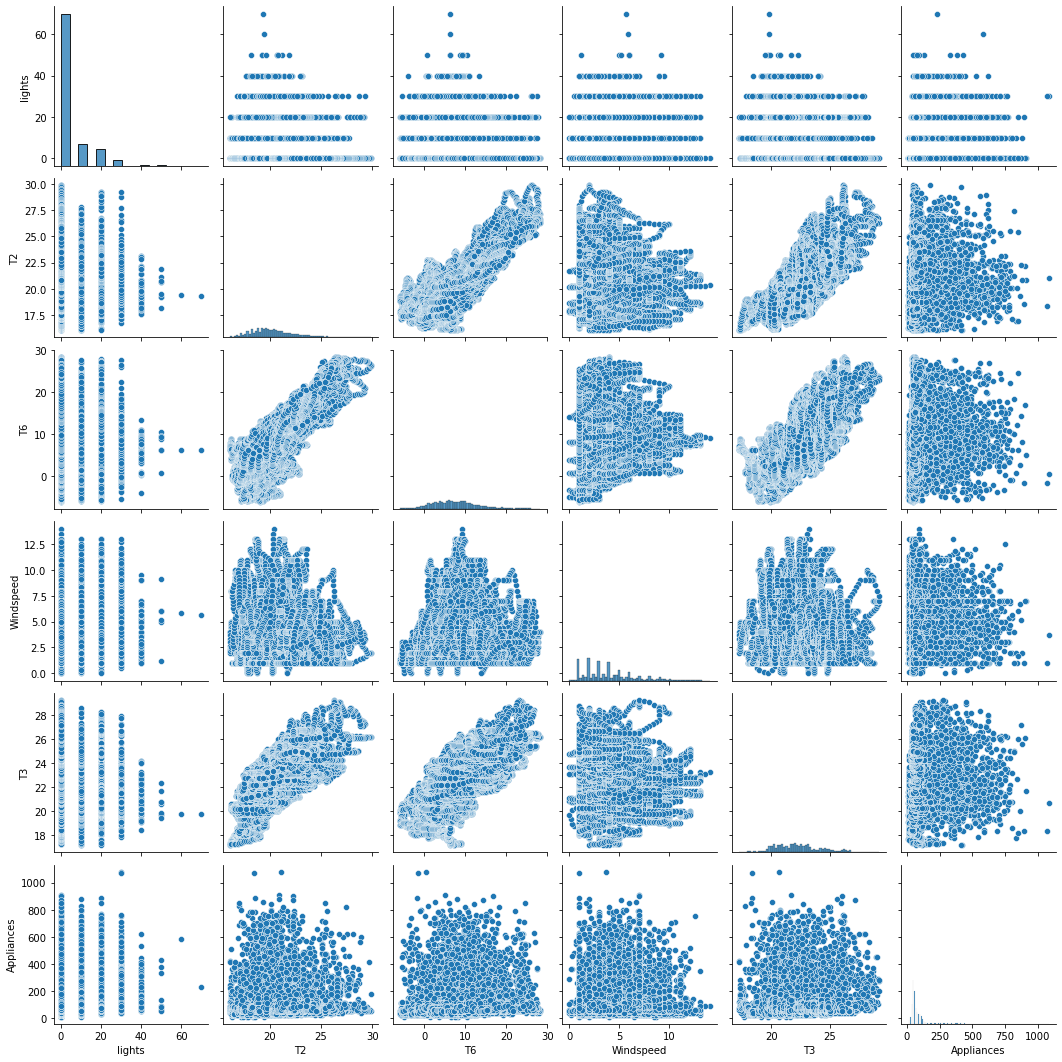

In [31]:
plt.figure(figsize=(25,16))
sn.pairplot(base_aux)

In [32]:
x = sm.add_constant(x, prepend=True)

In [33]:
modelo = sm.OLS(y,x)
modelo = modelo.fit()

In [34]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     257.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          3.82e-267
Time:                        15:44:00   Log-Likelihood:            -1.1875e+05
No. Observations:               19735   AIC:                         2.375e+05
Df Residuals:                   19729   BIC:                         2.376e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9766     12.479     -0.799      0.4

In [35]:
x.head(1)

,const,lights,T2,T6,Windspeed,T3
0,1.0,30,19.2,7.026667,7.0,19.79


In [38]:
print(modelo.predict([1,30,19.2,7.026667,7.0,19.79]))

[166.58651564]


In [39]:
base.head(1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433
